<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/CNN/exam/Category3_horses_or_humans_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
%config InlineBackend.fugure_format = 'retina'
def plot_loss_acc(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(acc)) # Get number of epochs
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     acc, label='Training accuracy' )
  plt.plot  ( epochs, val_acc, label='Validation accuracy' )
  plt.title ('Training and validation accuracy')
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     loss, label='Training loss' )
  plt.plot  ( epochs, val_loss, label='Validation loss' )
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title ('Training and validation loss'   )

In [ ]:
# =====================================================================================
# PROBLEM A2
#
# Build a Neural Network Model for Horse or Human Dataset.
# The test will expect it to classify binary classes.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is created by Laurence Moroney (laurencemoroney.com).
#
# Desired accuracy and validation_accuracy > 83%
# ======================================================================================

import urllib.request
import zipfile
import tensorflow as tf
# import os
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")


def solution_model():
  train_url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
  urllib.request.urlretrieve(train_url, 'horse-or-human.zip')
  local_file = 'horse-or-human.zip'
  zip_ref = zipfile.ZipFile(local_file, 'r')
  zip_ref.extractall('data/horse-or-human')

  val_url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
  urllib.request.urlretrieve(val_url, 'validation-horse-or-human.zip')
  local_file = 'validation-horse-or-human.zip'
  zip_ref = zipfile.ZipFile(local_file, 'r')
  zip_ref.extractall('data/validation-horse-or-human')
  zip_ref.close()

  TRAINING_DIR = 'data/horse-or-human'
  VALIDATION_DIR = 'data/validation-horse-or-human'

  train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # YOUR IMAGE SIZE SHOULD BE 150x150
  train_generator=train_datagen.flow_from_directory(directory=TRAINING_DIR, batch_size=20, class_mode='binary',target_size=(150,150))
  validation_generator=validation_datagen.flow_from_directory(directory=VALIDATION_DIR, batch_size=20, class_mode='binary',target_size=(150,150))

  #Derive label details
  class_dict = train_generator.class_indices # returns ie. {'cat': 0, 'dog': 1}
  print(class_dict)
  num_classes = len(class_dict)

    model=tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                tf.keras.layers.MaxPooling2D(2, 2),
                tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 512, activation = 'relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
        ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator)

    return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_model()
    model.save("mymodel.h5")

In [20]:
import urllib.request
import zipfile
import tensorflow as tf
# import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
urllib.request.urlretrieve(train_url, 'horse-or-human.zip')
local_file = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/horse-or-human')

val_url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(val_url, 'validation-horse-or-human.zip')
local_file = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [32]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255.)

# YOUR IMAGE SIZE SHOULD BE 300x300
train_generator=train_datagen.flow_from_directory(directory=TRAINING_DIR, batch_size=20, class_mode='binary',target_size=(300,300))
validation_generator=validation_datagen.flow_from_directory(directory=VALIDATION_DIR, batch_size=20, class_mode='binary',target_size=(300,300))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [33]:
#Derive label details
class_dict = train_generator.class_indices # returns ie. {'cat': 0, 'dog': 1}
print(class_dict)
num_classes = len(class_dict)

{'horses': 0, 'humans': 1}


In [68]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Input(shape=(300,300,3)),
    # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu', input_shape=(300,300,3)), #, strides= 2, padding='same'
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #num of units is 1 since we're using sigmoid activation
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 512)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 512)     2359808   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 512)       2359808   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 512)       0

In [69]:
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def lr_update(epoch, lr):
    """
    For the first 5 epochs the learning rate will be 0.005.
    From epoch 6 and on, the learning rate will be reduced 1% per epoch
    """
    if epoch <= 5:
        return 0.0001
    else:
        return lr * 0.05

lr_scheduler = LearningRateScheduler(lr_update)

In [73]:
#callbacks
# callback = myCallback()
MCP = tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=2, verbose=1,mode="auto",min_lr=0.000000001)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=3,verbose=1,start_from_epoch=5) #patience=3,


#Train and compile model
lr = 0.0001 #1e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

tf.keras.backend.clear_session()
history = model.fit(train_generator, validation_data=validation_generator, epochs=4) #ES, callback, RLP , callbacks=[MCP, lr_scheduler, ES]

Epoch 1/4
52/52 [==============================] - 34s 590ms/step - loss: 0.1619 - accuracy: 0.9445 - val_loss: 4.5991 - val_accuracy: 0.5234
Epoch 2/4
52/52 [==============================] - 31s 587ms/step - loss: 0.1281 - accuracy: 0.9591 - val_loss: 1.8877 - val_accuracy: 0.7031
Epoch 3/4
52/52 [==============================] - 31s 581ms/step - loss: 0.1294 - accuracy: 0.9620 - val_loss: 1.8517 - val_accuracy: 0.6914
Epoch 4/4
52/52 [==============================] - 31s 583ms/step - loss: 0.0753 - accuracy: 0.9747 - val_loss: 10.4505 - val_accuracy: 0.5117


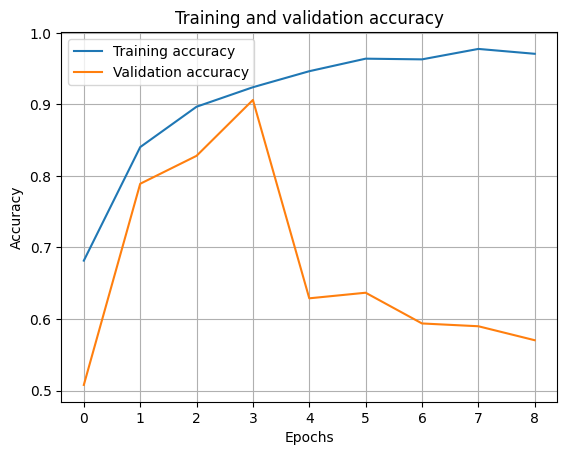

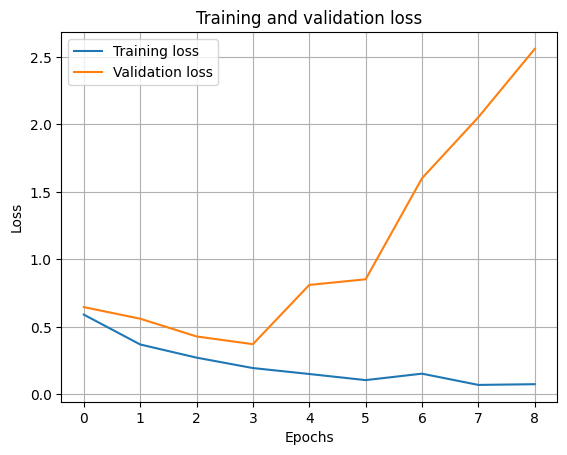

In [71]:
# Plot training results
plot_loss_acc(history)

In [72]:




# model=tf.keras.models.Sequential([
#             tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#             tf.keras.layers.MaxPooling2D(2, 2),
#             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#             tf.keras.layers.MaxPooling2D(2,2),
#             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#             tf.keras.layers.MaxPooling2D(2,2),
#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(units = 512, activation = 'relu'),
#             tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator)

# return model
